In [3]:
import numpy as np
%matplotlib inline
from pylab import *

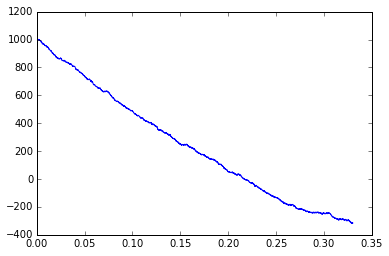

In [92]:
nX00 = nY00 = 1000
nX10 = nY10 = 2000
nZ00 = 0
nZ10 = 0
gamma0 = 5000
gamma1 = 50
gamma2 = 5 * 10**(-5)
gamma3 = 5
gamma = np.array([gamma0, gamma1, gamma2, gamma3])
V = 1
n0 = np.array([nX00, nX10, nY00, nY10, nZ00, nZ10])

nu0 = np.array([0, 0, +1, 0, 0, 0])
nu1 = np.array([0, 0, 0, +1, +1, 0])
nu2 = np.array([0, 0, +1, -1, 0, 0])
nu3 = np.array([0, 0, -1, 0, 0, +1])
nu = [nu0, nu1, nu2, nu3]
t_max = 1000

def calculate_r(n, gamma):
    r0 = gamma[0]
    r1 = gamma[1]
    r2 = gamma[2] * n[3] * (n[3]-1)/2 * n[4]
    r3 = gamma[3] * n[3]
    r = [r0, r1, r2, r3]
    return r

def reaction(V, n0, nu, gamma, t_max):
    t = 0
    n = n0

    for i in range(0, 5000):
        r = calculate_r(n, gamma)
        r_tot = sum(r)
        if r_tot==0:
            break
        deltat = np.random.uniform()
        dt = (1/r_tot) * np.log(1/deltat)
        t = t + dt
        i = np.random.rand()
        i = np.argmax(i<np.cumsum(r)/r_tot)
        n = n + nu[i]
        yield t, n
        
t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
#plot(t, n[2] / n0[2], label="Simulation $y_0$")
#plot(t, n[3] / n0[3], 'r', label="Simulation $y_1$")
plot(t, n[2], label="Simulation $y_0$")
#plot(t, n[3], 'r', label="Simulation $y_1$")